#       Shelter Animal Outcomes 4

## Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
#from sklearn.grid_search import GridSearchCV
#from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('../Shelter_train.csv')
df_test = pd.read_csv('../Shelter_test.csv')

In [3]:
X = df_train.ix[:, :-1]
y = df_train.ix[:, -1]
df_test = df_test.drop('ID', 1)

In [5]:
clf = LogisticRegression()
cross_validation.cross_val_score(clf, X, y, scoring="log_loss")

array([-1.02051202, -1.01842145, -1.02075702])

In [6]:
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(y, 2),
              scoring='log_loss')
rfecv.fit(X, y)
X_r = rfecv.transform(X)

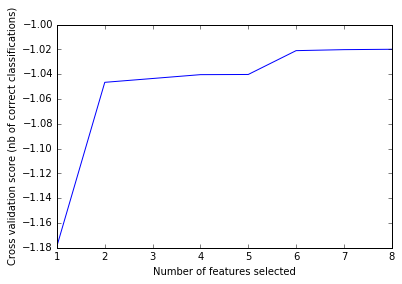

In [7]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [8]:
cross_validation.cross_val_score(clf, X_r, y, scoring="log_loss")

array([-1.02051202, -1.01842145, -1.02075702])

In [9]:
#pipeline = Pipeline([
#        ('featureSelection', SelectFromModel(LogisticRegression(penalty="l1"))),
#        ('clf', LogisticRegression())
#    ])
#pipeline.fit(X, y)
#params = {
#    'clf__C': [1, 3, 10, 30, 100, 300, 1000]
#}
#grid_search = GridSearchCV(pipeline, params)
#grid_search.fit(X, y)
#grid_search.best_score_
#predictions = grid_search.predict_proba(df_test)
predictions = rfecv.predict_proba(df_test)
output = pd.DataFrame(predictions, columns=['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'])
output.index.names = ['ID']
output.index += 1
output.head()

,Adoption,Died,Euthanasia,Return_to_owner,Transfer
1,0.092751,0.005376,0.053986,0.249257,0.598631
2,0.447191,0.002281,0.054882,0.335087,0.160559
3,0.674577,0.005250,0.030903,0.048511,0.240759
4,0.243199,0.006512,0.062644,0.253397,0.434248
5,0.585641,0.001798,0.019460,0.308717,0.084383


In [10]:
output.to_csv('../submission-logisticRegression.2.0.csv', index_label = 'ID')